In [140]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Part 1: Load the data into a DataFrame

In [141]:
adm = pd.DataFrame()
adm = pd.read_csv('Admission_Predict.csv')

In [142]:
#Getting the top few rows to explore the dataset
adm.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [143]:
#Statistical analysis of the dataset
adm.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


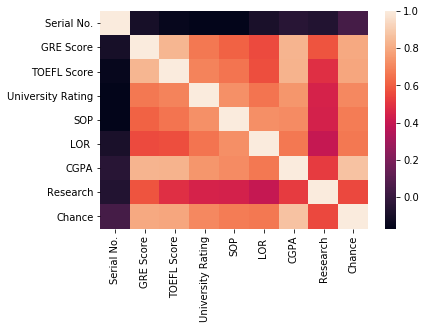

In [144]:
#Heatmap of data
heat = adm.corr()
sns.heatmap(heat, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

### Part 2: Calculate the mean GRE score of students with a chance of admission above  85%

In [145]:
#Changing name of column
adm = adm.rename({"Chance of Admit ":"Chance"}, axis='columns') 
adm.head()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [146]:
adm_filter = adm[adm['Chance']>0.85] #Filtering out students with chance less than 85% or 0.85

In [147]:
# Resetting index
adm_filter.reset_index(drop=True, inplace = True)

In [148]:
adm_filter.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,6,330,115,5,4.5,3.0,9.34,1,0.90
2,23,328,116,5,5.0,5.0,9.50,1,0.94
3,24,334,119,5,5.0,4.5,9.70,1,0.95
4,25,336,119,5,4.0,3.5,9.80,1,0.97


In [149]:
#Calculating mean of GRE Score of students with chance of admission above 85%
print("Mean of GRE scores of students with chance of admissions above 85%:", adm_filter["GRE Score"].mean())

Mean of GRE scores of students with chance of admissions above 85%: 331.144578313253


### Part 3: Calculate the mean chance of admissions of students for which the research column is 1

In [150]:
adm_filter1 = adm[adm['Research'] == 1]
adm_filter1.reset_index(drop=True, inplace = True)
adm_filter1.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,6,330,115,5,4.5,3.0,9.34,1,0.90


In [151]:
adm_filter1.mean()
print("Mean chance of admissions for students with 1 research:", adm_filter1["Chance"].mean())

Mean chance of admissions for students with 1 research: 0.7959817351598172


### Part 4: Calculate the correlation coefficient between CGPA and Chance of Admission

In [152]:
print("Correlation coefficient betweeen CGPA and Chance of Admission: ",adm[['CGPA','Chance']].corr()['CGPA']['Chance'])

Correlation coefficient betweeen CGPA and Chance of Admission:  0.8732890993553011


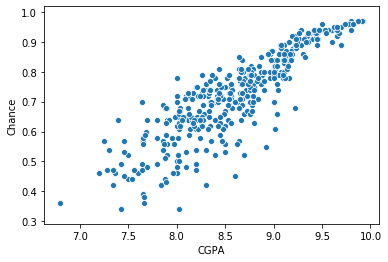

In [153]:
#Visualising correlation using scatterplot
sns.scatterplot(x= 'CGPA', y = 'Chance', data= adm)

### Part 5: Plot a histogram of the chance of admission. What distribution does it seem to have?

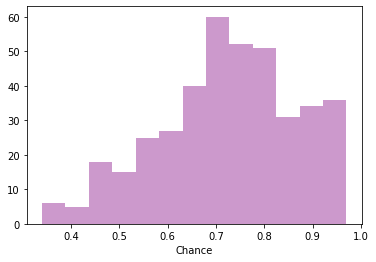

In [154]:
sns.distplot(adm['Chance'], kde=False, color = 'purple');

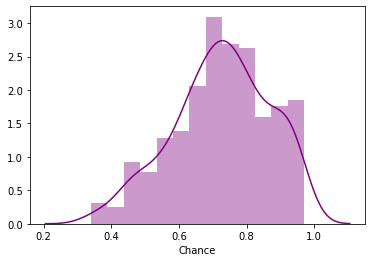

In [155]:
sns.distplot(adm['Chance'], color = 'Purple')
#The histogram appears to be left skewed since it has an elongated left tail.

### Part 6: Calculate the mean and standard deviation of the chance of admission.

In [156]:
chance_mean = adm['Chance'].mean()
print("Mean of chance of admission:", chance_mean)

Mean of chance of admission: 0.7243499999999996


In [157]:
chance_std = adm['Chance'].std()
print("Standard deviation of chance of admission:", chance_std)

Standard deviation of chance of admission: 0.14260933017384092


### Part 7: Plot a histogram of CGPA

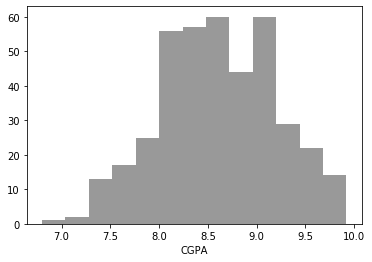

In [158]:
sns.distplot(adm['CGPA'], kde=False, color = 'black');

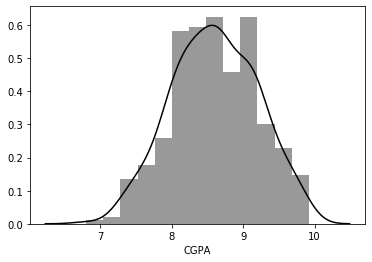

In [159]:
sns.distplot(adm['CGPA'], color = 'Black')
#This seems to be normally distributed plot

### Part 8: Calculate the mean and standard deviation of the CGPA

In [160]:
cgpa_mean = adm['CGPA'].mean()
print("Mean of CGPA:", cgpa_mean)

Mean of CGPA: 8.598924999999998


In [161]:
cgpa_std = adm['CGPA'].std()
print("Standard deviation of CGPA:", cgpa_std)

Standard deviation of CGPA: 0.5963170964964317


### Part 9: Plot GRE vs Chance of Admission

In [162]:
from matplotlib import pyplot

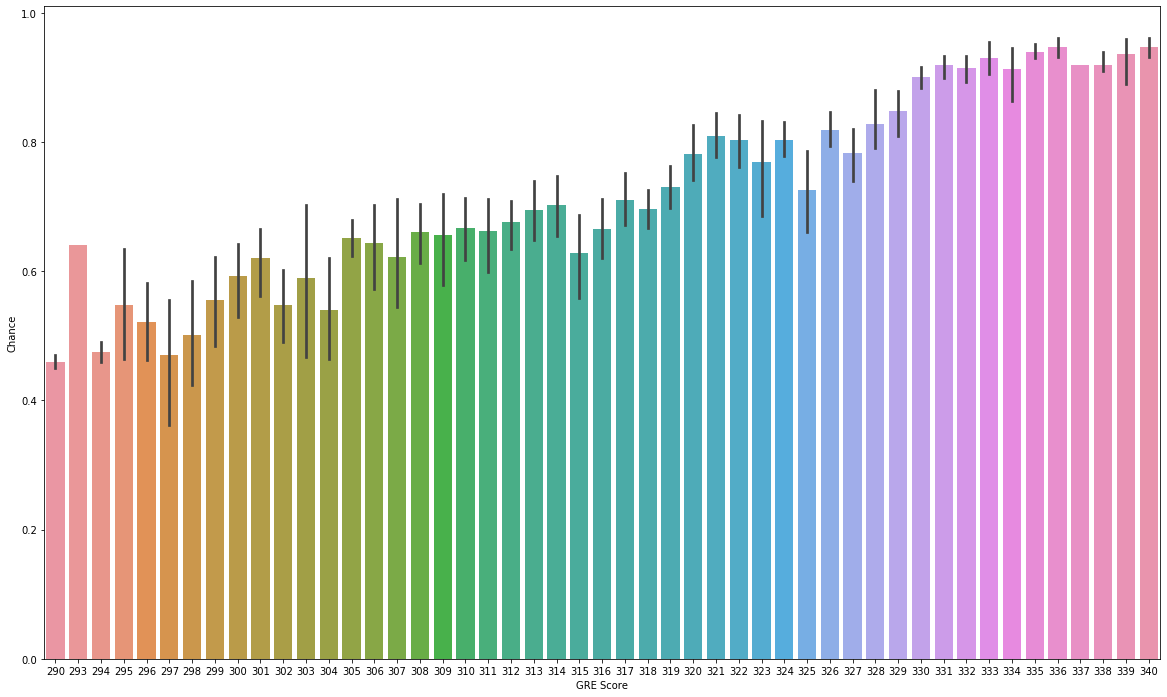

In [163]:
fig, ax = pyplot.subplots(figsize=(20,12))
sns.barplot(x='GRE Score',y='Chance',data=adm)
plt.show()

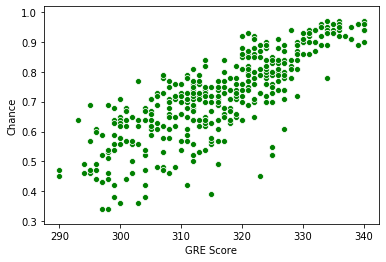

In [164]:
sns.scatterplot(x='GRE Score',y='Chance',data=adm,color='green')

### Part 9: Calculate the correlation coefficient between GRE and Chance of Admission

In [165]:
print("Correlation coefficient between GRE and Chance of Admission: ",adm['GRE Score'].corr(adm['Chance']))

Correlation coefficient between GRE and Chance of Admission:  0.8026104595903503


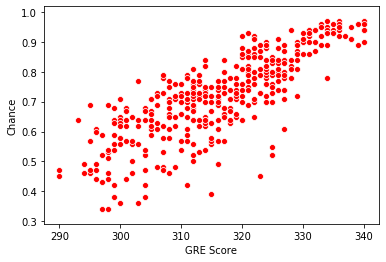

In [166]:
#Visualising correlation using scatterplot

sns.scatterplot(x= 'GRE Score', y = 'Chance', data= adm, color = 'red')

### Part 10: Plot TOEFL vs Chance of Admission

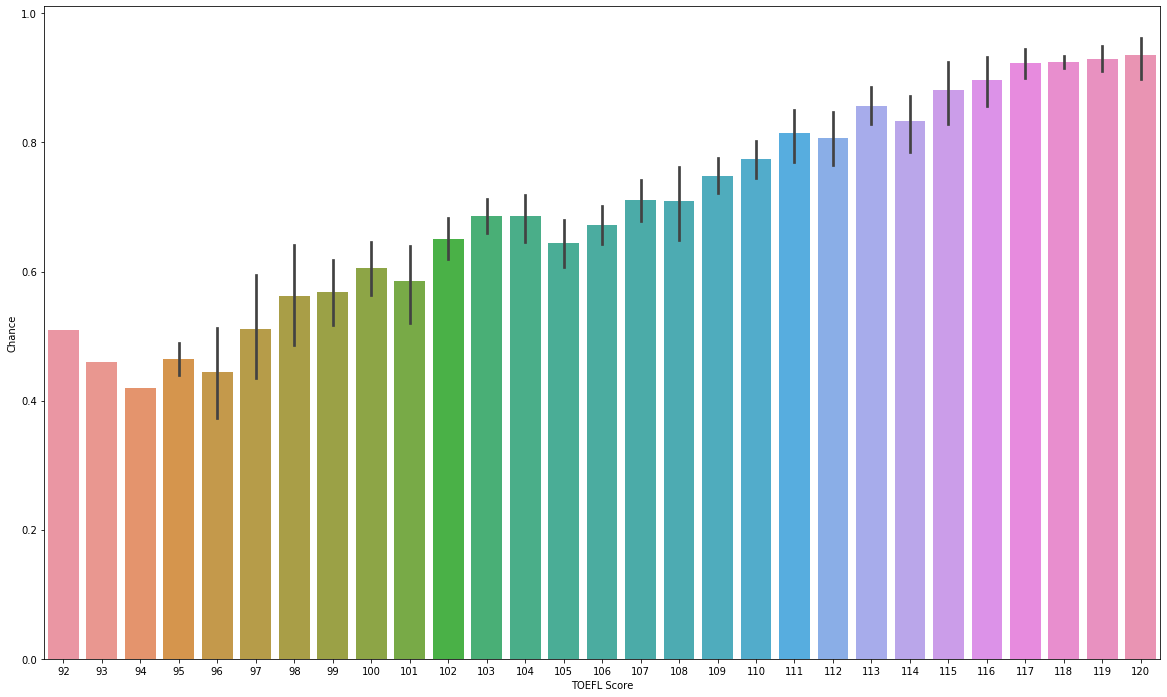

In [167]:
fig, ax = pyplot.subplots(figsize=(20,12))
sns.barplot(x='TOEFL Score',y='Chance',data=adm)
plt.show()

### Part 11: Calculate the correlation coefficient between TOEFL and Chance of Admission

In [168]:
print("Correlation coefficient between TOEFL and Chance of Admission: ",adm['TOEFL Score'].corr(adm['Chance']))

Correlation coefficient between TOEFL and Chance of Admission:  0.7915939869351044


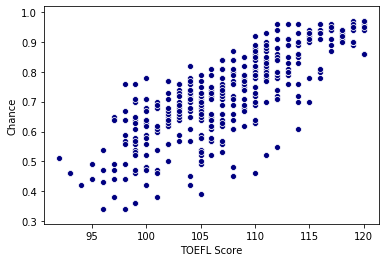

In [169]:
#Visualising correlation using scatterplot
sns.scatterplot(x= 'TOEFL Score', y = 'Chance', data= adm,color = 'navy' )

### Part 12: Plot CGPA vs Chance of Admission

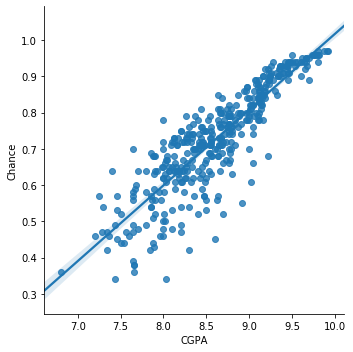

In [170]:
sns.lmplot(x='CGPA',y='Chance',data=adm)

### Part 13: Calculate the correlation coefficient between CGPA and Chance of Admission

In [171]:
print("Correlation coefficient between CGPA and Chance of Admission: ",adm['CGPA'].corr(adm['Chance']))

Correlation coefficient between CGPA and Chance of Admission:  0.8732890993553001


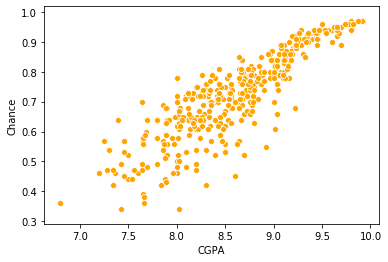

In [172]:
#Visualising correlation using scatterplot

sns.scatterplot(x= 'CGPA', y = 'Chance', data= adm, color = 'orange')

### Part 14: Plot one more graph that you think helps the analysis of the data - 1

Plot between SOP Rating and Chance of Admission


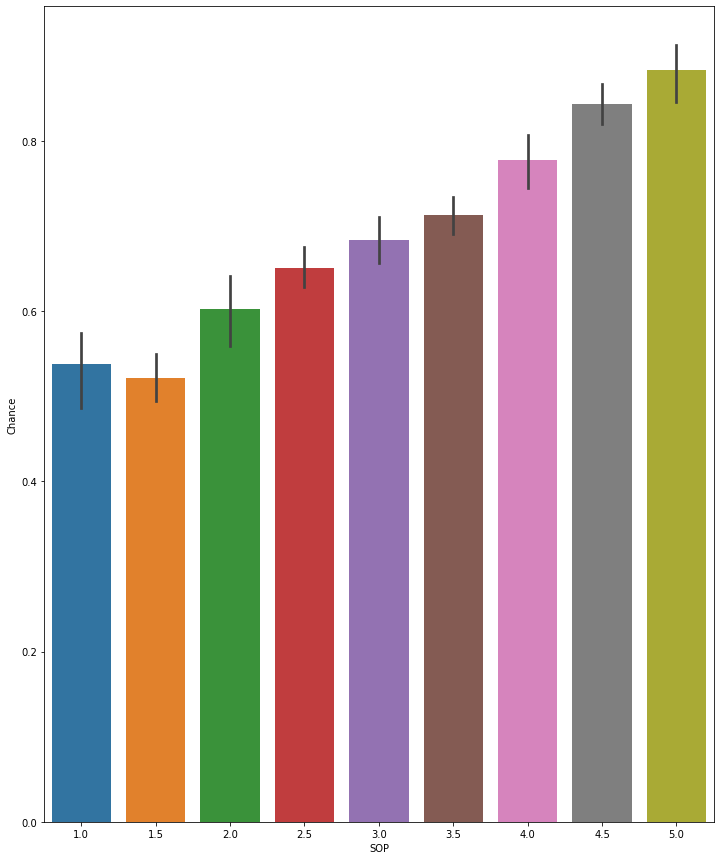

In [173]:
fig, ax = pyplot.subplots(figsize=(12,15))
sns.barplot(x='SOP',y='Chance',data=adm)
plt.show()

### Part 15: Calculate the correlation coefficient between the variables in Part 14 - 1

In [174]:
print("Correlation coefficient between SOP Rating and Chance of Admission: ",adm['SOP'].corr(adm['Chance']))

Correlation coefficient between SOP Rating and Chance of Admission:  0.6757318583886716


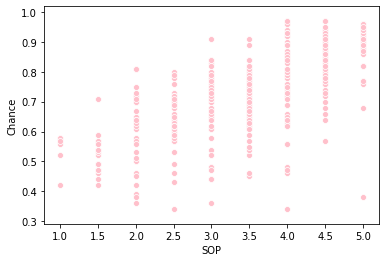

In [175]:
sns.scatterplot(x= 'SOP', y = 'Chance', data= adm, color='pink')

### Part 14: Plot one more graph that you think helps the analysis of the data - 2

Plot between Research and Chance of Admission

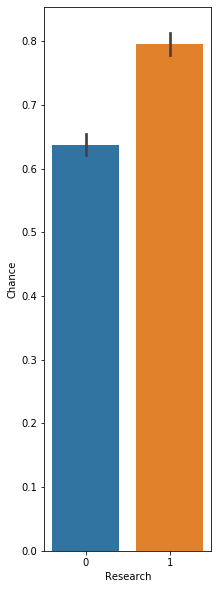

In [176]:
fig, ax = pyplot.subplots(figsize=(3,10))
sns.barplot(x='Research',y='Chance',data=adm)
plt.show()

### Part 15: Calculate the correlation coefficient between the variables in Part 14 - 2

In [177]:
print("Correlation coefficient between Research and Chance of Admission: ",adm['Research'].corr(adm['Chance']))

Correlation coefficient between Research and Chance of Admission:  0.5532021370190395


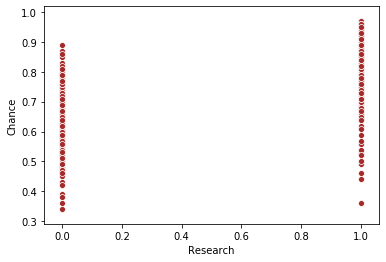

In [178]:
sns.scatterplot(x= 'Research', y = 'Chance', data= adm, color='brown')

### Part 14: Plot one more graph that you think helps the analysis of the data - 3

Plot between LOR and Chance of Admission

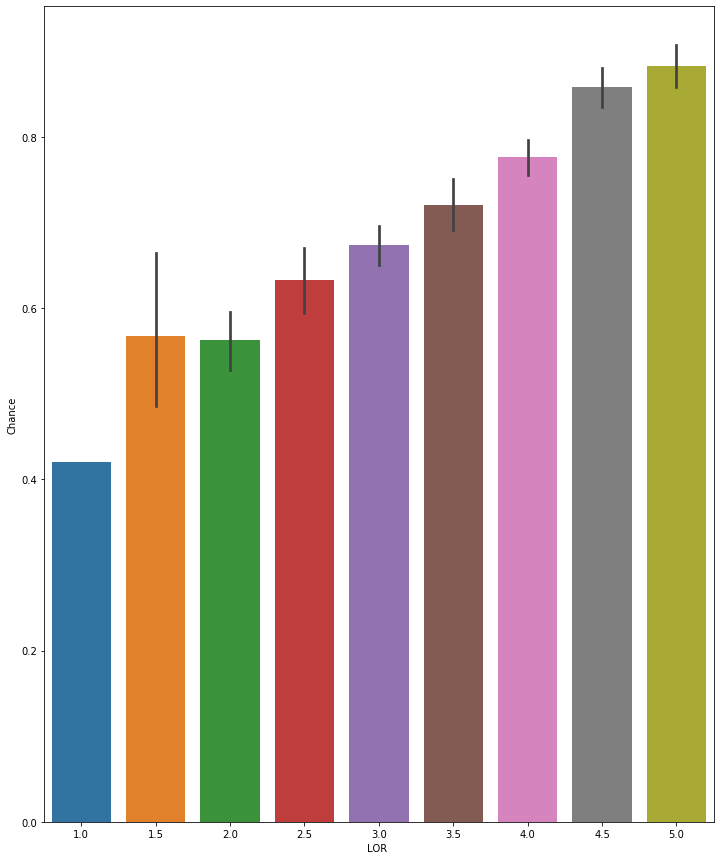

In [179]:
fig, ax = pyplot.subplots(figsize=(12,15))
sns.barplot(x='LOR ',y='Chance',data=adm)
plt.show()

### Part 15: Calculate the correlation coefficient between the variables in Part 14 - 3

In [180]:
print("Correlation coefficient between LOR and Chance of Admission: ",adm['LOR '].corr(adm['Chance']))

Correlation coefficient between LOR and Chance of Admission:  0.6698887920106934


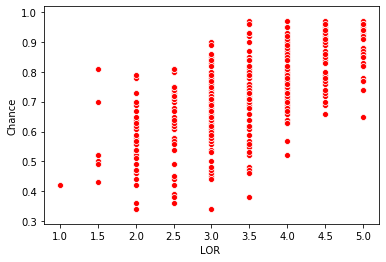

In [181]:
sns.scatterplot(x= 'LOR ', y = 'Chance', data= adm, color='red')

### Part 14: Plot one more graph that you think helps the analysis of the data - 4

Plot between University Rating and Chance of Admission

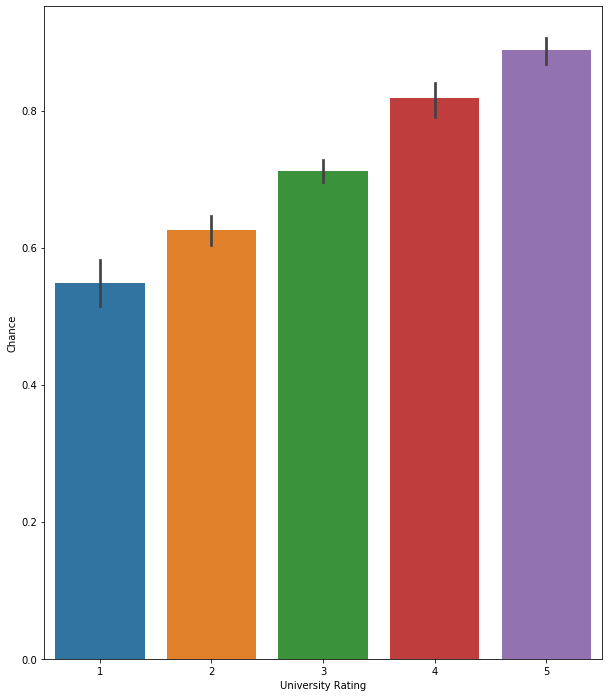

In [182]:
fig, ax = pyplot.subplots(figsize=(10, 12))
sns.barplot(x='University Rating',y='Chance',data=adm)
plt.show()

### Part 15: Calculate the correlation coefficient between the variables in Part 14 - 4

In [183]:
print("Correlation coefficient between University Rating and Chance of Admission: ",adm['University Rating'].corr(adm['Chance']))

Correlation coefficient between University Rating and Chance of Admission:  0.7112502503917218


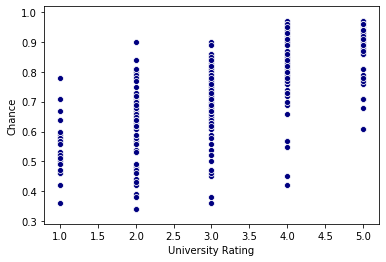

In [184]:
sns.scatterplot(x= 'University Rating', y = 'Chance', data= adm, color='navy')